## **Importing Required Libraries and accesing files from Google Drive**

In [0]:
#importing basic required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Filter the uneccesary warnings
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#installing requirements to access google drive
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link="https://drive.google.com/open?id=1ZjR4-A8TrViaRXC_BYjRme5jo0udrLpz"

Seperating File Id from rest of the Link

In [0]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ZjR4-A8TrViaRXC_BYjRme5jo0udrLpz


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Training Dataset.csv')

In [0]:
df = pd.read_csv('Training Dataset.csv')

# **Studying the Trends in Data (EDA)**

In [0]:
df.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
having_IP_Address,-1,1,1,1,1,-1,1,1,1,1
URL_Length,1,1,0,0,0,0,0,0,0,1
Shortining_Service,1,1,1,1,-1,-1,-1,1,-1,-1
having_At_Symbol,1,1,1,1,1,1,1,1,1,1
double_slash_redirecting,-1,1,1,1,1,-1,1,1,1,1
Prefix_Suffix,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
having_Sub_Domain,-1,0,-1,-1,1,1,-1,-1,1,-1
SSLfinal_State,-1,1,-1,-1,1,1,-1,-1,1,1
Domain_registeration_length,-1,-1,-1,1,-1,-1,1,1,-1,-1
Favicon,1,1,1,1,1,1,1,1,1,1


Checking for null values in the dataframe

In [0]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [0]:
#Basic info about the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [0]:
#Using Describe Method to see patterns in data along with min,max and quarlitles for each column
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
having_IP_Address,11055.0,0.313795,0.949534,-1.0,-1.0,1.0,1.0,1.0
URL_Length,11055.0,-0.633198,0.766095,-1.0,-1.0,-1.0,-1.0,1.0
Shortining_Service,11055.0,0.738761,0.673998,-1.0,1.0,1.0,1.0,1.0
having_At_Symbol,11055.0,0.700588,0.713598,-1.0,1.0,1.0,1.0,1.0
double_slash_redirecting,11055.0,0.741474,0.671011,-1.0,1.0,1.0,1.0,1.0
Prefix_Suffix,11055.0,-0.734962,0.678139,-1.0,-1.0,-1.0,-1.0,1.0
having_Sub_Domain,11055.0,0.063953,0.817518,-1.0,-1.0,0.0,1.0,1.0
SSLfinal_State,11055.0,0.250927,0.911892,-1.0,-1.0,1.0,1.0,1.0
Domain_registeration_length,11055.0,-0.336771,0.941629,-1.0,-1.0,-1.0,1.0,1.0
Favicon,11055.0,0.628584,0.777777,-1.0,1.0,1.0,1.0,1.0


In [0]:
#Checking the values in Results column
df["Result"].unique()

array([-1,  1])

In [0]:
x,y=0,0 #setting individual couter values to 0

In [0]:
#grouping data according to Result labels
cls=[(1,x),(-1,y)]
for i in range(0,len(df)): #this loop functions as a counnter loop
  if df['Result'].iloc[i]==1:
    x=x+1
  else:
    y=y+1
cls

[(1, 6157), (-1, 4898)]

In [0]:
#the above code can simply be written using inbuilt function counter
from collections import Counter
classes=Counter(df["Result"].values)
class_dist=pd.DataFrame(classes.most_common(),columns=["Class","Num_of_Observations"])
class_dist

,Class,Num_of_Observations
0,1,6157
1,-1,4898


# **Basic Plots and Graphical Representation of Relations (EDA)**

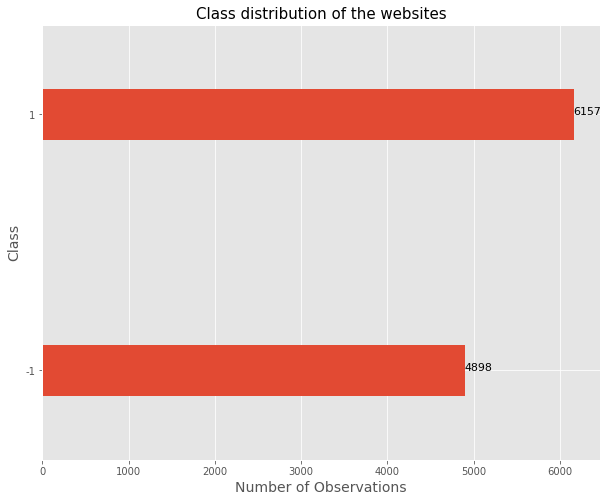

In [0]:
#plotting the class distribution of each class
plt.style.use('ggplot')

subplot = class_dist.groupby('Class')['Num_of_Observations'].sum().plot(kind='barh', width=0.2, figsize=(10,8))

subplot.set_title('Class distribution of the websites', fontsize = 15)
subplot.set_xlabel('Number of Observations', fontsize = 14)
subplot.set_ylabel('Class', fontsize = 14)

for i in subplot.patches:
    subplot.text(i.get_width()+0.1, i.get_y()+0.1, \
            str(i.get_width()), fontsize=11)

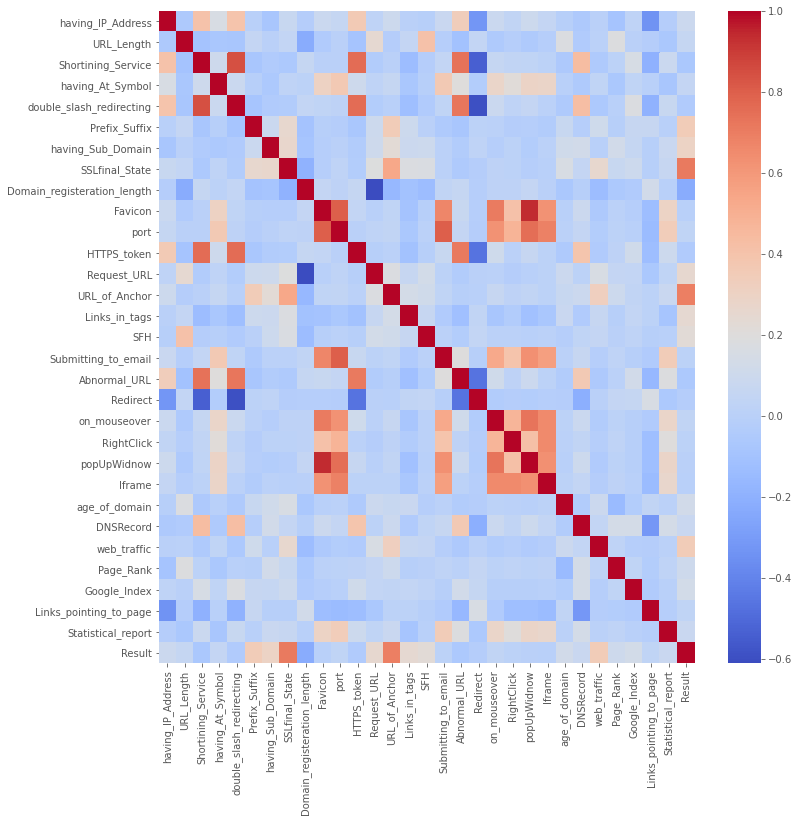

In [0]:
#heatmap of correlation between columns of data
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cmap="coolwarm")

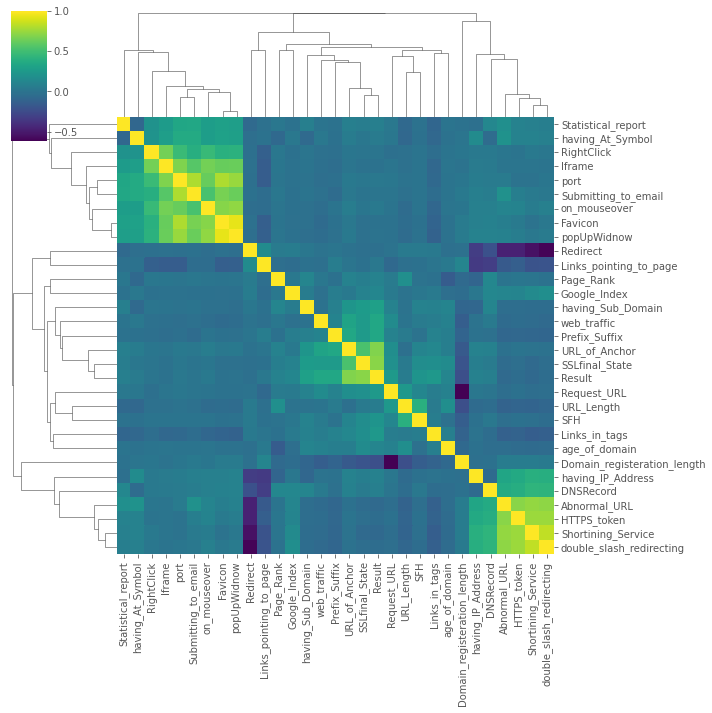

In [0]:
#clustermapping the dataframe correlations
sns.clustermap(df.corr(),cmap='viridis')

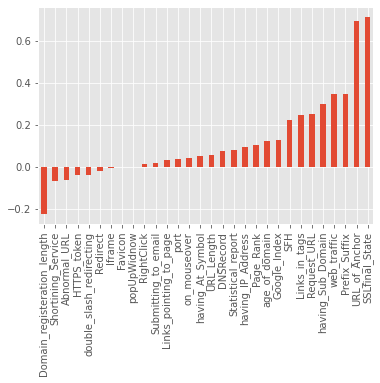

In [0]:
#bar plot of correlation with Result label makes it easy to understand dependencies
df.corr()["Result"][:-1].sort_values().plot(kind='bar')

# **Processing the Data and splitting into Training and Testing Data**

Generally Machine Learning Classifiers have trouble interpreting the -1 and 1 values used in the Result column, basically it expects 0 and 1 labels.

In [0]:
#using .map function to change -1 values to 0
df['Result'] = df['Result'].map({-1:0, 1:1})
df['Result'].unique()

array([0, 1])

Splitting the Data into Training and Test Dataframes.

In [0]:
from sklearn.model_selection import train_test_split
X=df.drop("Result",axis=1).values
y=df["Result"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# **Logistic Regression**

Building Logistic Regression Model.

In [0]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()
lm.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Predicting and evaluating using Logistic Regression Model.

In [0]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score,accuracy_score
print('Accuracy score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(accuracy_score(y_test, lm.predict(X_test))*100.))
print('F1 score of the Logistic Regression classifier with default hyperparameter values {0:.2f}%'.format(f1_score(y_test, lm.predict(X_test))*100.))
print('\n')
print('----Classification report of the Logistic Regression classifier with default hyperparameter value----')
print('\n')
print(classification_report(y_test, lm.predict(X_test), target_names=['Phishing Websites', 'Normal Websites']))

Accuracy score of the Logistic Regression classifier with default hyperparameter values 92.22%
F1 score of the Logistic Regression classifier with default hyperparameter values 93.10%


----Classification report of the Logistic Regression classifier with default hyperparameter value----


                   precision    recall  f1-score   support

Phishing Websites       0.92      0.91      0.91       971
  Normal Websites       0.93      0.94      0.93      1240

         accuracy                           0.92      2211
        macro avg       0.92      0.92      0.92      2211
     weighted avg       0.92      0.92      0.92      2211



Adjusting the Model parameters to increase accuracy and provide better predictions.

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Define the grid of values
penalty = ['l2']
C = [0.5,0.6,0.7,0.8, 0.9, 1.0]
tol = [0.01, 0.001 ,0.0001,0.000001]
max_iter = [100, 150, 200, 250,300]

# Create a dictionary where tol and max_iter are keys and the lists of their values are the corresponding values
param_grid = dict(penalty=penalty, C=C, tol=tol, max_iter=max_iter)


Predicting using optimized parameters.

In [0]:
random_model = RandomizedSearchCV(estimator=lm, param_distributions=param_grid, cv=5)

# Fit random_model to the data
random_model_result = random_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = random_model_result.best_score_, random_model_result.best_params_
print("Best score: %.2f using %s" % (best_score*100., best_params))

Best score: 92.92 using {'tol': 0.01, 'penalty': 'l2', 'max_iter': 150, 'C': 0.6}


# **K-Nearest Neighbours**

Implementing K-Nearest Neighbour Algorithm.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 917   54]
 [  54 1186]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       971
           1       0.96      0.96      0.96      1240

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



Using Elbow Method to get optimal value of K.

In [0]:
error_rate = []
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
min(error_rate)

0.048846675712347354

Here we notice no elbows are formed and the error rate keeps rising in a staggered but continuous fashion with lowest value at k=1.

Text(0, 0.5, 'Error Rate')

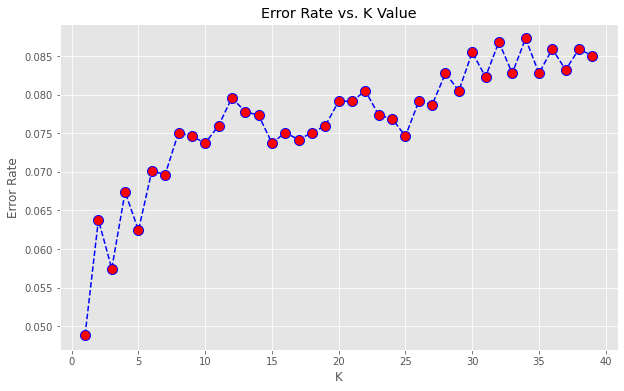

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Hence we choose K=1 as our optimal value for final model.

In [0]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[ 917   54]
 [  54 1186]]


              precision    recall  f1-score   support

           0       0.94      0.94      0.94       971
           1       0.96      0.96      0.96      1240

    accuracy                           0.95      2211
   macro avg       0.95      0.95      0.95      2211
weighted avg       0.95      0.95      0.95      2211



# **Decision Tree and Random Forest Classifier**

Implementing a Decision Tree.

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       971
           1       0.96      0.96      0.96      1240

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [0]:
print(confusion_matrix(y_test,predictions))

[[ 926   45]
 [  49 1191]]


A group of decision trees combined make up a Random Forest Classifier Model. Which we are going to implement in the next few block of codes.

In [0]:
from sklearn.ensemble import RandomForestClassifier
error= []
# Will take some time
for i in range(550,600):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train,y_train)
    pred_i = rfc.predict(X_test)
    error.append(np.mean(pred_i != y_test))

We again use Elbow method to evaluate optimal value for n_estimator (which is basically the number of trees in your forest.)

In [0]:
error.index(min(error))

21

We determine where the lowest error rate occurs at and use that as our value for n_estimator.

Text(0, 0.5, 'Error Rate')

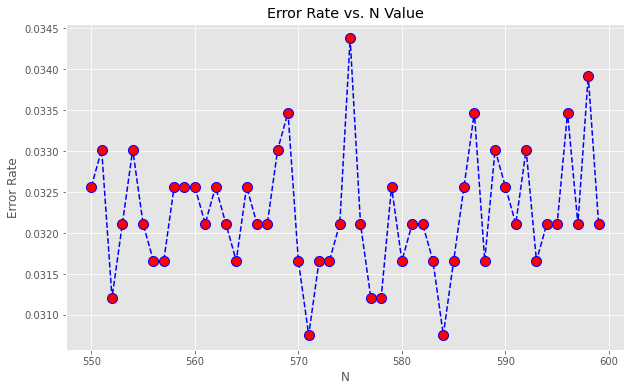

In [0]:
plt.figure(figsize=(10,6))
plt.plot(range(550,600),error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')

In [0]:
rfc = RandomForestClassifier(n_estimators=571)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       971
           1       0.97      0.97      0.97      1240

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [0]:
print(confusion_matrix(y_test,predictions))

[[ 935   36]
 [  36 1204]]


# **Support Vector Machines**

We will be implementing Support Vector Classifier in the following section.

In [0]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
predictions = svc.predict(X_test)

In [0]:
print(confusion_matrix(y_test,predictions))

[[ 893   78]
 [  51 1189]]


In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       971
           1       0.94      0.96      0.95      1240

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



We Notice that the SVC gives an accuracy of ~94%, which is pretty good, but can we fine tune the parameters to get more out of the model.

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}
grid=GridSearchCV(SVC(),param_grid,verbose=3)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.572, total=   5.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.579, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.8s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.579, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.584, total=   4.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.581, total=   4.7s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.934, total=   1.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.937, total=   1.9s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.938, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.933, total=   2.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  4.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [0]:
predictions=grid.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[ 925   46]
 [  38 1202]]


Using GridSearchCV we are able to arrive at the best values for parameters in the given range and increase accuracy to ~96%.

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       971
           1       0.96      0.97      0.97      1240

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



# **Deep Learning and Artificial Neural Networks**

In this section we will finally put the lid on the project and look at some Neural Networks to classify the websites as phising or not.

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import *

In [0]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(18,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [0]:
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
8844/8844 [==============================] - 1s 58us/step - loss: 0.3214 - accuracy: 0.8647
Epoch 2/50
8844/8844 [==============================] - 0s 40us/step - loss: 0.1771 - accuracy: 0.9322
Epoch 3/50
8844/8844 [==============================] - 0s 38us/step - loss: 0.1605 - accuracy: 0.9391
Epoch 4/50
8844/8844 [==============================] - 0s 41us/step - loss: 0.1506 - accuracy: 0.9389
Epoch 5/50
8844/8844 [==============================] - 0s 42us/step - loss: 0.1417 - accuracy: 0.9445
Epoch 6/50
8844/8844 [==============================] - 0s 42us/step - loss: 0.1333 - accuracy: 0.9476
Epoch 7/50
8844/8844 [==============================] - 0s 40us/step - loss: 0.1262 - accuracy: 0.9476
Epoch 8/50
8844/8844 [==============================] - 0s 43us/step - loss: 0.1202 - accuracy: 0.9498
Epoch 9/50
8844/8844 [==============================] - 0s 42us/step - loss: 0.1118 - accuracy: 0.9547
Epoch 10/50
8844/8844 [==============================] - 0s 43us/step - l

In [0]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_38 (Dense)             (None, 18)                558       
_________________________________________________________________
dense_39 (Dense)             (None, 7)                 133       
_________________________________________________________________
dense_40 (Dense)             (None, 1)                 8         
Total params: 1,629
Trainable params: 1,629
Non-trainable params: 0
_________________________________________________________________


In [0]:
pr=model.predict_classes(X_test)
print(classification_report(y_test,pr))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       971
           1       0.97      0.95      0.96      1240

    accuracy                           0.96      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



In [0]:
confusion_matrix(y_test,pr)

array([[ 934,   37],
       [  58, 1182]])

In [0]:
from keras import callbacks

es_cb = callbacks.EarlyStopping(monitor='loss', min_delta=0.001, patience=5)

In [0]:
history = model.fit(X_train, y_train, batch_size=64, epochs=128, verbose=1, callbacks=[es_cb])

scores = model.evaluate(X_test, y_test)
print('\nAccuracy score of the Neural Network with basic hyperparameter settings {0:.2f}%'.format(scores[1]*100))
pr1=model.predict_classes(X_test)

Epoch 1/128
8844/8844 [==============================] - 0s 23us/step - loss: 0.0371 - accuracy: 0.9835
Epoch 2/128
8844/8844 [==============================] - 0s 22us/step - loss: 0.0373 - accuracy: 0.9839
Epoch 3/128
8844/8844 [==============================] - 0s 23us/step - loss: 0.0354 - accuracy: 0.9859
Epoch 4/128
8844/8844 [==============================] - 0s 22us/step - loss: 0.0339 - accuracy: 0.9864
Epoch 5/128
8844/8844 [==============================] - 0s 22us/step - loss: 0.0333 - accuracy: 0.9860
Epoch 6/128
8844/8844 [==============================] - 0s 23us/step - loss: 0.0320 - accuracy: 0.9860
Epoch 7/128
8844/8844 [==============================] - 0s 23us/step - loss: 0.0351 - accuracy: 0.9848
Epoch 8/128
8844/8844 [==============================] - 0s 23us/step - loss: 0.0329 - accuracy: 0.9848
Epoch 9/128
8844/8844 [==============================] - 0s 22us/step - loss: 0.0347 - accuracy: 0.9855
Epoch 10/128
8844/8844 [==============================] - 0s 20u

In [0]:
print(confusion_matrix(y_test,pr1))
print('\n',classification_report(y_test,pr1))

[[ 919   52]
 [  26 1214]]

               precision    recall  f1-score   support

           0       0.97      0.95      0.96       971
           1       0.96      0.98      0.97      1240

    accuracy                           0.96      2211
   macro avg       0.97      0.96      0.96      2211
weighted avg       0.96      0.96      0.96      2211



Adding Dropout Layer to check whether it improves accuracy.

In [0]:
model = Sequential()


# input layer
model.add(Dense(30,  activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(18, activation='relu'))
model.add(Dropout(0.5))

# hidden layer
model.add(Dense(7, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy"])

In [0]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=500,
          batch_size=128,
          validation_data=(X_test, y_test),
          callbacks=[es_cb]
          )

Train on 8844 samples, validate on 2211 samples
Epoch 1/500
8844/8844 [==============================] - 0s 39us/step - loss: 0.7968 - accuracy: 0.4950 - val_loss: 0.6719 - val_accuracy: 0.6445
Epoch 2/500
8844/8844 [==============================] - 0s 15us/step - loss: 0.6764 - accuracy: 0.5563 - val_loss: 0.6458 - val_accuracy: 0.7417
Epoch 3/500
8844/8844 [==============================] - 0s 15us/step - loss: 0.6414 - accuracy: 0.5945 - val_loss: 0.5834 - val_accuracy: 0.8517
Epoch 4/500
8844/8844 [==============================] - 0s 16us/step - loss: 0.5824 - accuracy: 0.6725 - val_loss: 0.4596 - val_accuracy: 0.8942
Epoch 5/500
8844/8844 [==============================] - 0s 16us/step - loss: 0.5148 - accuracy: 0.7505 - val_loss: 0.3554 - val_accuracy: 0.9136
Epoch 6/500
8844/8844 [==============================] - 0s 15us/step - loss: 0.4660 - accuracy: 0.7946 - val_loss: 0.3009 - val_accuracy: 0.9150
Epoch 7/500
8844/8844 [==============================] - 0s 17us/step - loss

In [0]:
losses = pd.DataFrame(model.history.history)

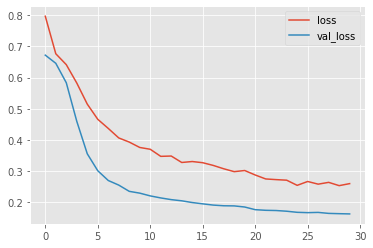

In [0]:
losses[['loss','val_loss']].plot()

In [0]:
predictions = model.predict_classes(X_test)

In this case adding the Dropout layer adversely affected the accuracy of the model.

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       971
           1       0.95      0.94      0.94      1240

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



In [0]:
confusion_matrix(y_test,predictions)

array([[ 908,   63],
       [  77, 1163]])

# ***Thank You for staying till The End***